In [1]:
# NBVAL_SKIP
import os
#os.environ['SPS_HOME'] = '/mnt/storage/annalena_data/sps_fsps'
#os.environ['SPS_HOME'] = '/home/annalena/sps_fsps'
os.environ['SPS_HOME'] = '/Users/annalena/Documents/GitHub/fsps'

# Dust extinction models in Rubix

This notebook shows the basics of the dust extinction models implemented in Rubix. We have closely followed the implementation by the [dust extinction package](https://dust-extinction.readthedocs.io/en/latest/index.html). Currently we only support a subset of all available models, namely the Cardelli, Clayton, & Mathis (1989) Milky Way R(V) dependent model, the Gordon et al. (2023) Milky Way R(V) dependent model and the Fitzpatrick & Massa (1990) 6 parameter ultraviolet shape model.

We will demonstrate how to use these models to calculate and visualize the effects of dust extinction on stellar spectra. Additionally, we will show how to integrate these models into a Rubix pipeline to simulate the impact of dust on galaxy observations.

First, we import the dust models from Rubix.

In [2]:
# NBVAL_SKIP
from rubix.spectra.dust.extinction_models import Cardelli89, Gordon23

In [3]:
# NBVAL_SKIP
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

We visulaize some of the aspects of the models, i.e. their A(x)/Av as a function of wavelength.

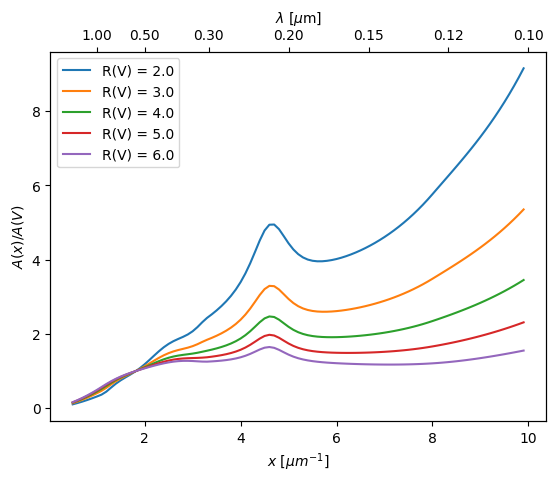

In [4]:
# NBVAL_SKIP
fig, ax = plt.subplots()

# generate the curves and plot them
x = np.arange(0.5,10.0,0.1) # in 1/microns
Rvs = [2.0,3.0,4.0,5.0,6.0]
for cur_Rv in Rvs:
    ext_model = Cardelli89(Rv=cur_Rv)
    ax.plot(x,ext_model(x),label='R(V) = ' + str(cur_Rv))

ax.set_xlabel(r'$x$ [$\mu m^{-1}$]')
ax.set_ylabel(r'$A(x)/A(V)$')

# for 2nd x-axis with lambda values
axis_xs = np.array([0.1, 0.12, 0.15, 0.2, 0.3, 0.5, 1.0])
new_ticks = 1 / axis_xs
new_ticks_labels = ["%.2f" % z for z in axis_xs]
tax = ax.twiny()
tax.set_xlim(ax.get_xlim())
tax.set_xticks(new_ticks)
tax.set_xticklabels(new_ticks_labels)
tax.set_xlabel(r"$\lambda$ [$\mu$m]")

ax.legend(loc='best')

We can now also use those models and show their effects on a black body spectrum. 
For that, we instantiate the Cardelli model, create a black body spectrum with astropy and apply the dust extinction with a fiducial Rv of 3.1 to the spectrum for a range of Av parameters. 

In [5]:
# NBVAL_SKIP
# Let's import some packages
from astropy.modeling.models import BlackBody
import astropy.units as u
from matplotlib.ticker import ScalarFormatter

In [6]:
# NBVAL_SKIP
# initialize cardelli model with Rv=3.1
ext = Cardelli89(Rv=3.1)

In [7]:
# NBVAL_SKIP
# generate wavelengths between 3 and 10 microns
#    within the valid range for the Cardelli R(V) dependent model
lam = np.logspace(np.log10(3), np.log10(10.0), num=1000)

# setup the inputs for the blackbody function
wavelengths = lam*1e4 # Angstroem
temperature = 10000 # Kelvin

In [8]:
# NBVAL_SKIP
# get the blackbody flux
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
flux = bb_lam(wavelengths)

In [9]:
# NBVAL_SKIP
# get the extinguished blackbody flux for different amounts of dust
flux_ext_av05 = flux*ext.extinguish(lam, Av=0.5)
flux_ext_av15 = flux*ext.extinguish(lam, Av=1.5)
flux_ext_ebv10 = flux*ext.extinguish(lam, Ebv=1.0)

<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
/var/folders/jj/bjgx38w95f3f7mrpqbzrxbsh0000gp/T/ipykernel_93705/1777885020.py:10: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$ [$\AA$]')


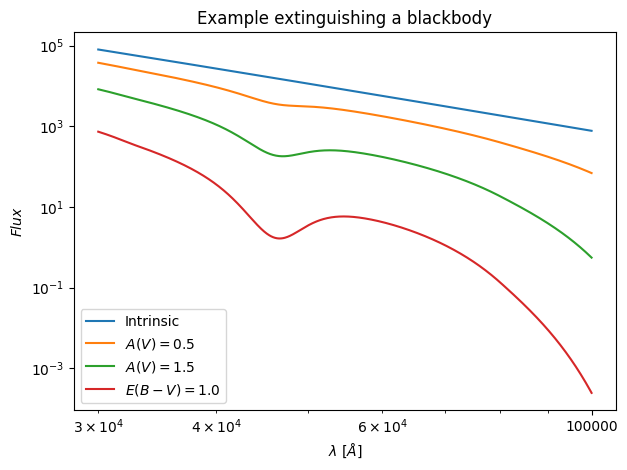

In [10]:
# NBVAL_SKIP
# plot the intrinsic and extinguished fluxes
fig, ax = plt.subplots()

ax.plot(wavelengths, flux, label='Intrinsic')
ax.plot(wavelengths, flux_ext_av05, label='$A(V) = 0.5$')
ax.plot(wavelengths, flux_ext_av15, label='$A(V) = 1.5$')
ax.plot(wavelengths, flux_ext_ebv10, label='$E(B-V) = 1.0$')

ax.set_xlabel('$\lambda$ [$\AA$]')
ax.set_ylabel('$Flux$')

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_yscale('log')

ax.set_title('Example extinguishing a blackbody')

ax.legend(loc='best')
plt.tight_layout()

We see that the Cardelli model has some limited range in wavelength. 
Now let's try the same for the Gordon et al. model which has a broader wavelength support.  

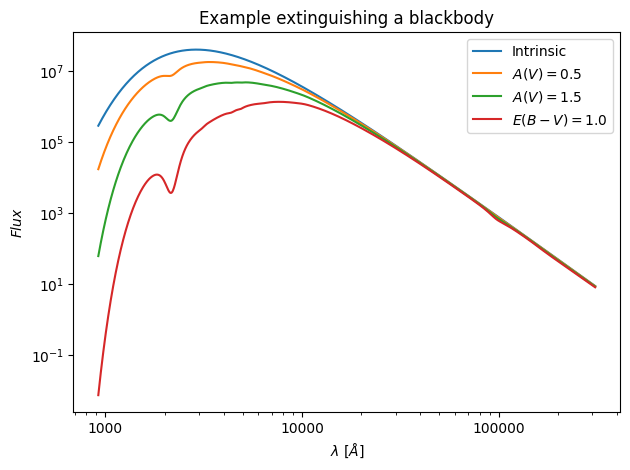

In [11]:
# NBVAL_SKIP
# generate wavelengths between 0.092 and 31 microns
#    within the valid range for the Gordon23 R(V) dependent relationship
lam = jnp.logspace(np.log10(0.092), np.log10(31.0), num=1000)

# setup the inputs for the blackbody function
wavelengths = lam*1e4 # Angstroem
temperature = 10000 # Kelvin

# get the blackbody flux
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
flux = bb_lam(wavelengths)

# initialize the model
ext = Gordon23(Rv=3.1)

# get the extinguished blackbody flux for different amounts of dust
flux_ext_av05 = flux*ext.extinguish(lam, Av=0.5)
flux_ext_av15 = flux*ext.extinguish(lam, Av=1.5)
flux_ext_ebv10 = flux*ext.extinguish(lam, Ebv=1.0)

# plot the intrinsic and extinguished fluxes
fig, ax = plt.subplots()

ax.plot(wavelengths, flux, label='Intrinsic')
ax.plot(wavelengths, flux_ext_av05, label='$A(V) = 0.5$')
ax.plot(wavelengths, flux_ext_av15, label='$A(V) = 1.5$')
ax.plot(wavelengths, flux_ext_ebv10, label='$E(B-V) = 1.0$')

ax.set_xlabel(r'$\lambda$ [$\AA$]')
ax.set_ylabel('$Flux$')

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_yscale('log')

ax.set_title('Example extinguishing a blackbody')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

We see, as expected, the impact of dust is most important for short wavelength, i.e. the blue part of the spectrum.

# Run the RUBIX pipeline with dust


We now turn to running the RUBIX pipeline with dust included. For this, we first need to setup the config accordingly. That is as easy as replacing `"pipeline":{"name": "calc_ifu"}` with `"pipeline":{"name": "calc_dusty_ifu"}` in the config.

In order to comapre a dusty and non dusty IFU cube, we first run a normal RUBIX pipeline.

In [12]:
#import os
#os.environ["SPS_HOME"] = '/Users/buck/Documents/Nexus/codes/fsps'
#ILLUSTRIS_API_KEY = 'c0112e1fa11489ef0e6164480643d1c8'

In [13]:
#NBVAL_SKIP

import matplotlib.pyplot as plt
from rubix.core.pipeline import RubixPipeline 
import os
config = {
    "pipeline":{"name": "calc_ifu_memory"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": os.environ.get("ILLUSTRIS_API_KEY"),
            "particle_type": ["stars", "gas"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 11,
        "reuse": False,
        },
        
        "subset": {
            "use_subset": True,
            "subset_size": 50000,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-11.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 1,"noise_distribution": "normal"},},
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1,
         "rotation": {"type": "edge-on"},
        },
        
    "ssp": {
        "template": {
            "name": "BruzualCharlot2003"
        },
        "dust": {
            "extinction_model": "Cardelli89", #"Gordon23", 
            "dust_to_gas_ratio": 0.01, # need to check Remyer's paper
            "dust_to_metals_ratio": 0.4, # do we need this ratio if we set the dust_to_gas_ratio?
            "dust_grain_density": 3.5, # g/cm^3 #check this value
            "Rv": 3.1,
        },
    },        
}

2025-06-28 22:55:56,048 - rubix - INFO - 
   ___  __  _____  _____  __
  / _ \/ / / / _ )/  _/ |/_/
 / , _/ /_/ / _  |/ /_>  <
/_/|_|\____/____/___/_/|_|


2025-06-28 22:55:56,049 - rubix - INFO - Rubix version: 0.0.post427+g131f0ec.d20250602
2025-06-28 22:55:56,049 - rubix - INFO - JAX version: 0.5.0
2025-06-28 22:55:56,049 - rubix - INFO - Running on [CpuDevice(id=0)] devices


In [14]:
#NBVAL_SKIP
pipe = RubixPipeline(config)

inputdata = pipe.prepare_data()
rubixdata = pipe.run_sharded(inputdata)

/Users/annalena/Documents/GitHub/rubix/rubix/telescope/factory.py:26: UserWarning: No telescope config provided, using default stored in /Users/annalena/Documents/GitHub/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
2025-06-28 22:55:56,485 - rubix - INFO - Getting rubix data...
2025-06-28 22:55:56,486 - rubix - INFO - Rubix galaxy file already exists, skipping conversion
2025-06-28 22:55:56,558 - rubix - INFO - Centering stars particles
2025-06-28 22:55:57,110 - rubix - WARNING - The Subset value is set in config. Using only subset of size 50000 for stars
2025-06-28 22:55:57,150 - rubix - INFO - Centering gas particles
2025-06-28 22:55:57,471 - rubix - WARNING - The Subset value is set in config. Using only subset of size 50000 for gas
2025-06-28 22:55:57,472 - rubix - INFO - Data loaded with 50000 star particles and 50000 gas particles.
2025-06-28 22:55:57,472 - rubix - INFO - Setting up the pipeline...
2025-06-28 22:55:57,473 - rubix - DEBUG - Pipeline Configuration: {'Trans

Now we run the pipeline including the effects of dust.

Next to setting `"pipeline":{"name": "calc_ifu"}` there are some more nobs under the section `ssp` for `dust` that we can tweek if needed.

Options to consider are as follows:
*  the exact "extinction_model" to use. Currently Rubix supports "Cardelli89" or "Gordon23" 
*  the "dust_to_gas_model" to use. This currently refers to the fitting formula used by Remy-Ruyer et al. 2014. See their Table 1 for more info.
*  the "Xco" model used by Remy-Ruyer et al 2014. Either "Z" or "MW"
*  the "dust_grain_density" which depends on the type of dust at hand, see e.g. the NIST tables.
*  the "Rv" value in case one uses an Rv dependent dust model.

In [15]:
#NBVAL_SKIP

import matplotlib.pyplot as plt
from rubix.core.pipeline import RubixPipeline 
import os
config = {
    "pipeline":{"name": "calc_ifu_dusty_memory"},
    
    "logger": {
        "log_level": "DEBUG",
        "log_file_path": None,
        "format": "%(asctime)s - %(name)s - %(levelname)s - %(message)s",
    },
    "data": {
        "name": "IllustrisAPI",
        "args": {
            "api_key": os.environ.get("ILLUSTRIS_API_KEY"),
            "particle_type": ["stars", "gas"],
            "simulation": "TNG50-1",
            "snapshot": 99,
            "save_data_path": "data",
        },
        
        "load_galaxy_args": {
        "id": 11,
        "reuse": True,
        },
        
        "subset": {
            "use_subset": True,
            "subset_size": 50000,
        },
    },
    "simulation": {
        "name": "IllustrisTNG",
        "args": {
            "path": "data/galaxy-id-11.hdf5",
        },
    
    },
    "output_path": "output",

    "telescope":
        {"name": "MUSE",
         "psf": {"name": "gaussian", "size": 5, "sigma": 0.6},
         "lsf": {"sigma": 0.5},
         "noise": {"signal_to_noise": 1,"noise_distribution": "normal"},},
    "cosmology":
        {"name": "PLANCK15"},
        
    "galaxy":
        {"dist_z": 0.1,
         "rotation": {"type": "edge-on"},
        },
        
    "ssp": {
        "template": {
            "name": "BruzualCharlot2003"
        },
        "dust": {
            "extinction_model": "Cardelli89", #"Gordon23", 
            "dust_to_gas_model": "broken power law fit", # from Remyer's paper see their Table 1
            "Xco": "Z", # from Remyer's paper, see their Table 1
            "dust_grain_density": 3.0, # #check this value, reverse engeneered from Ibarrra-Medel 2018
            "Rv": 3.1,
        },
    },        
}

In [16]:
#NBVAL_SKIP
pipe = RubixPipeline(config)

inputdata = pipe.prepare_data()
rubixdata_dust = pipe.run_sharded(inputdata)

/Users/annalena/Documents/GitHub/rubix/rubix/telescope/factory.py:26: UserWarning: No telescope config provided, using default stored in /Users/annalena/Documents/GitHub/rubix/rubix/telescope/telescopes.yaml
  warnings.warn(
2025-06-28 22:56:05,191 - rubix - INFO - Getting rubix data...
2025-06-28 22:56:05,192 - rubix - INFO - Rubix galaxy file already exists, skipping conversion
2025-06-28 22:56:05,213 - rubix - INFO - Centering stars particles
2025-06-28 22:56:05,425 - rubix - WARNING - The Subset value is set in config. Using only subset of size 50000 for stars
2025-06-28 22:56:05,429 - rubix - INFO - Centering gas particles
2025-06-28 22:56:05,447 - rubix - WARNING - The Subset value is set in config. Using only subset of size 50000 for gas
2025-06-28 22:56:05,448 - rubix - INFO - Data loaded with 50000 star particles and 50000 gas particles.
2025-06-28 22:56:05,449 - rubix - INFO - Setting up the pipeline...
2025-06-28 22:56:05,449 - rubix - DEBUG - Pipeline Configuration: {'Trans

Let's compare one example spaxel spectrum with and without dust.

(25, 25, 3721)
(25, 25, 3721)


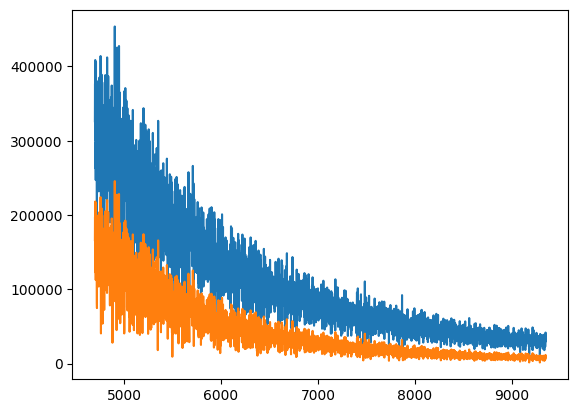

In [17]:
#NBVAL_SKIP
wave = pipe.telescope.wave_seq

spectra = rubixdata#.stars.datacube # Spectra of all stars
dusty_spectra = rubixdata_dust#.stars.datacube # Spectra of all stars
print(spectra.shape)
print(dusty_spectra.shape)

plt.plot(wave, spectra[12,12,:])
plt.plot(wave, dusty_spectra[12,12,:])

# Now let's visualize a nice edge-on galaxy in SDSS broad-band images with some nice dust lanes... 

In [18]:
# NBVAL_SKIP
from rubix.telescope.filters import load_filter, convolve_filter_with_spectra

In [19]:
# NBVAL_SKIP
# load all fliter curves for SLOAN
curves = load_filter("SLOAN")

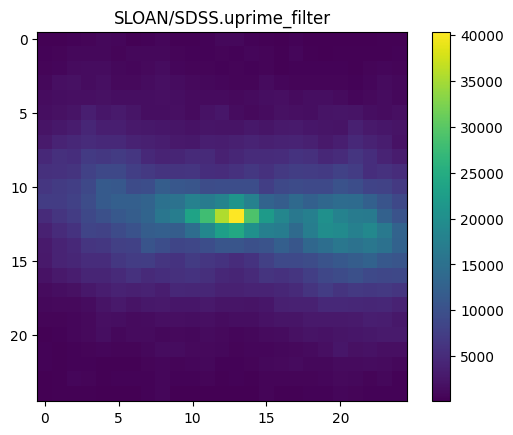

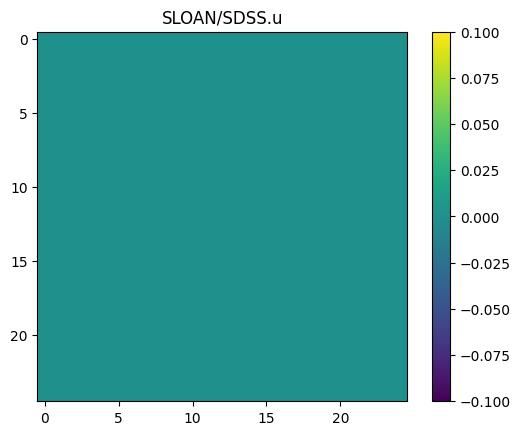

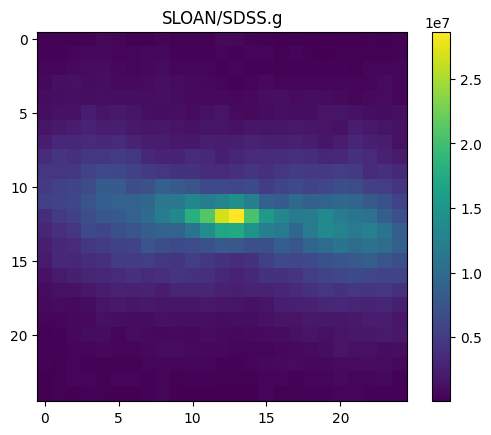

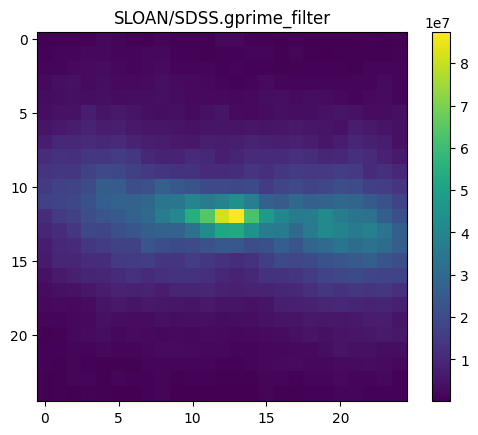

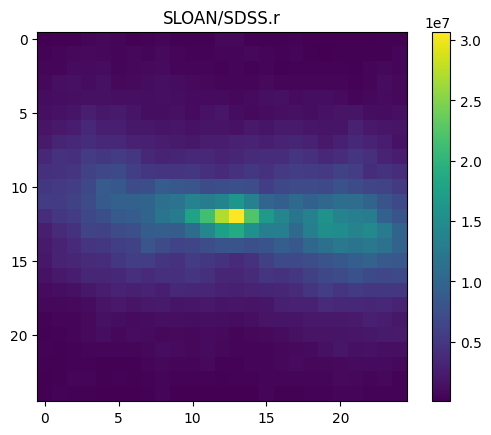

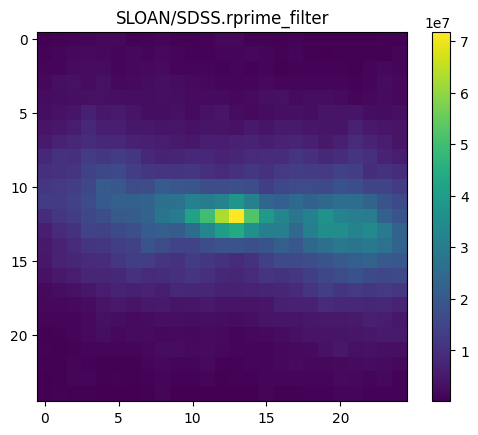

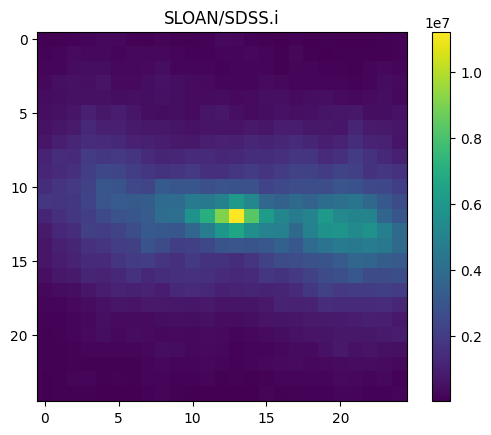

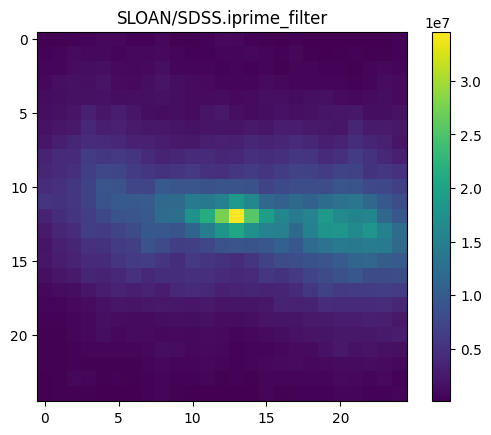

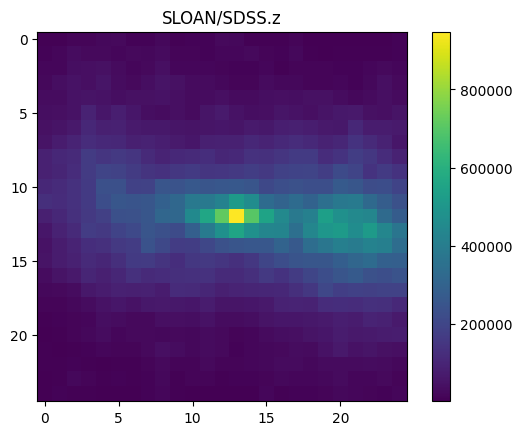

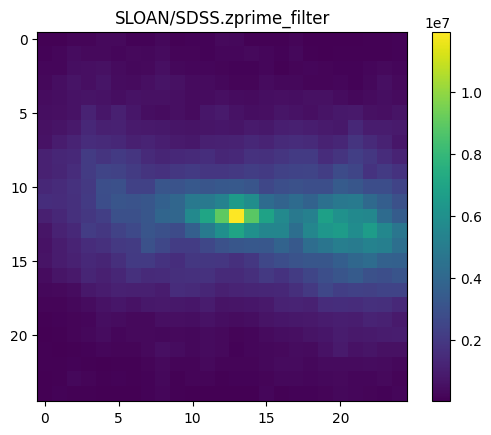

In [20]:
# NBVAL_SKIP
wave = pipe.telescope.wave_seq
filters,images = curves.apply_filter_curves(rubixdata_dust, wave).values()

for i_dust,name in zip(images, filters):
    plt.figure()
    plt.imshow(i_dust)
    plt.colorbar()
    plt.title(name)

# Sanity check: overlay gas column density map over the dusty emission image

In [21]:
# NBVAL_SKIP
idx = np.where(inputdata.gas.mass != 0)
gas_map = np.histogram2d(inputdata.gas.coords[:,0][idx], inputdata.gas.coords[:,1][idx], bins=(25,25), weights=np.squeeze(inputdata.gas.mass)[idx])

Text(0.5, 1.0, 'gas map')

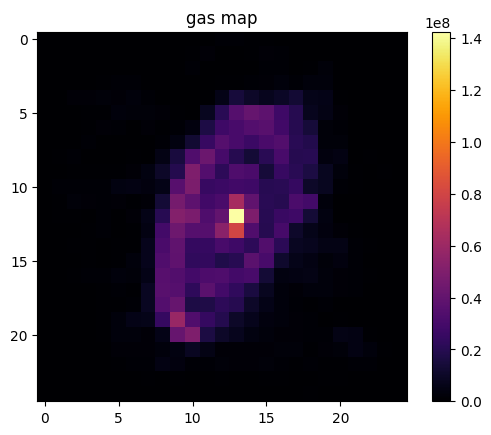

In [22]:
# NBVAL_SKIP
plt.figure()
plt.imshow(gas_map[0].T, cmap='inferno')
plt.colorbar()
plt.title("gas map")

# And in comparison to this, the same galaxy without dust...

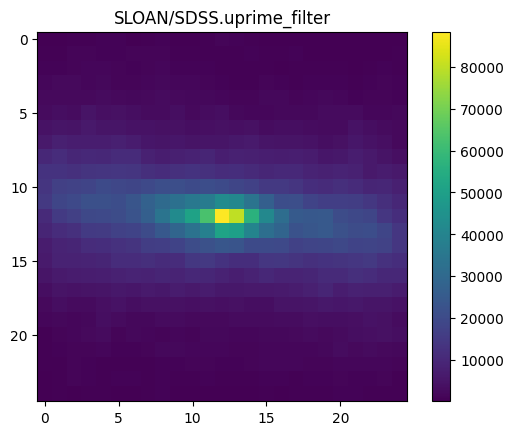

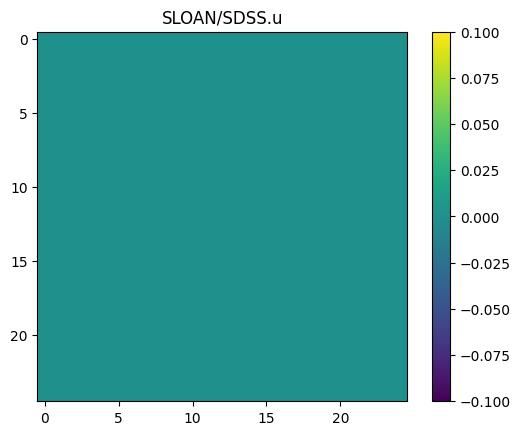

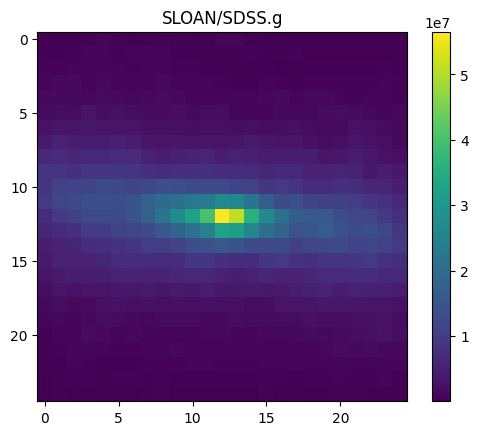

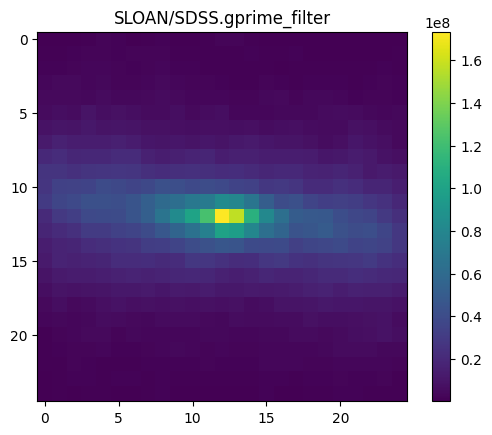

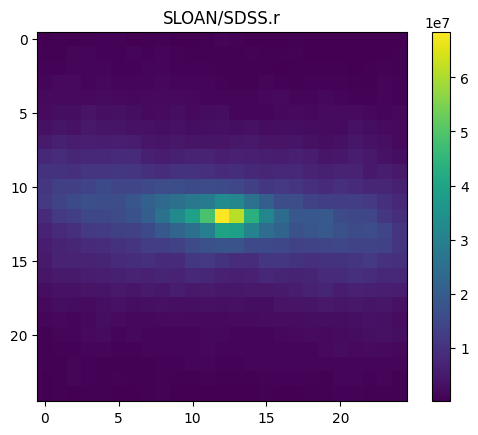

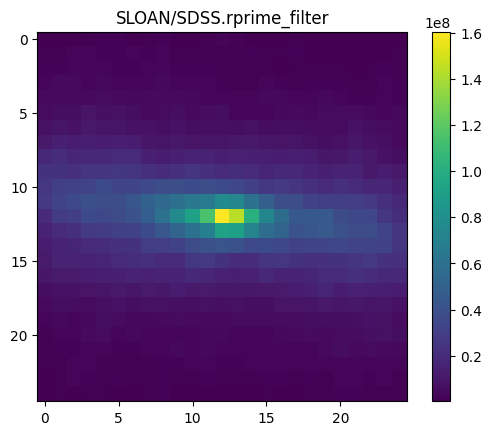

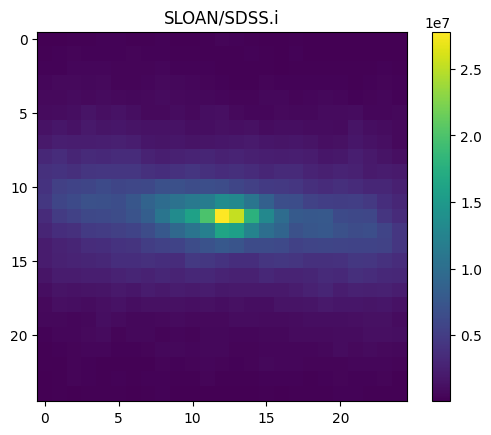

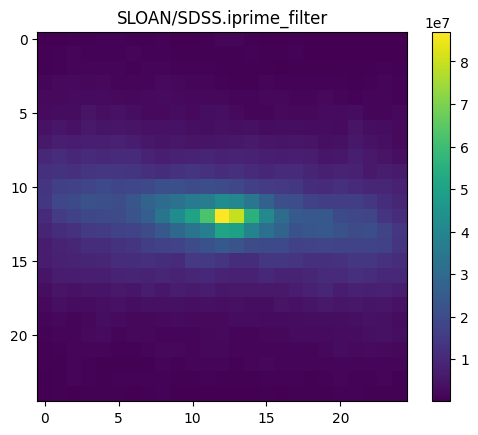

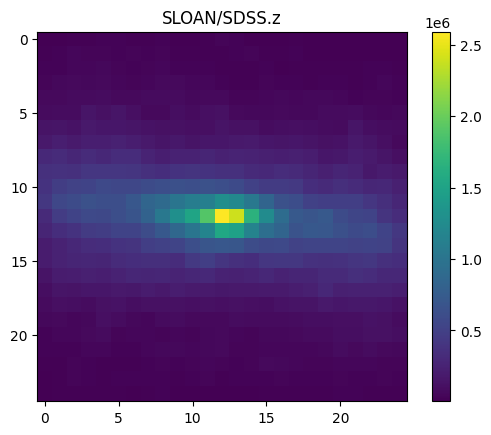

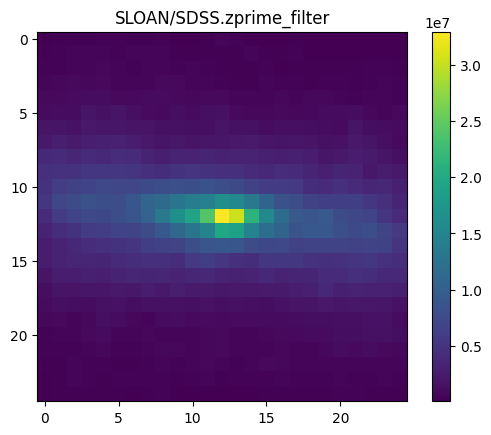

In [23]:
# NBVAL_SKIP
wave = pipe.telescope.wave_seq
filters,images = curves.apply_filter_curves(rubixdata, wave).values()

for i,name in zip(images, filters):
    plt.figure()
    plt.imshow(i)
    plt.colorbar()
    plt.title(name)